# Example Evaluation Code

This notebook will be very __similar__ to the code I use to evaluate your results - it is provided for __your convenience__ so that you can use it to evaluate your preprocessing results at any time before your __final submission__.

Please note that the results here will __NOT__ be the same as my evaluation results.

Let's start with loading the required packages.

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression


#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset


In [2]:
data = pd.read_csv('data_skew_imputed_outliers_fixed_min_max2.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'I1', 'I2', 'I3', 'P(IPO)', 'P(H)',
       'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2',
       'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'I3_Imput', 'division',
       'div_manufacturing', 'div_other', 'div_services', 'T1_Imput',
       'T2_Imput', 'T3_Imput', 'T4_Imput', 'T5_Imput', 'S1_Imput', 'S2_Imput',
       'S3_Imput', 'T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio', 'P(1Day)_Imput',
       'P(H)_Imput', 'P(L)_Imput', 'P(IPO)_Imput', 'P(mid)', 'Y1', 'Y2',
       'T4_Imput_ratio_skew', 'T3_Imput_ratio_skew', 'T5_Imput_ratio_skew',
       'S1_Imput_ratio_skew', 'S2_Imput_ratio_skew', 'S3_Imput_ratio_skew',
       'C5_skew', 'C3_skew', 'C3_cube_root', 'C7_log', 'C6_log', 'C1_Imput',
       'C2_Imput', 'C3_cube_root_Imput', 'C4_Imput', 'C5_log_Imput',
       'C6_log_Imput', 'C7_log_Imput', 'C3_cube_root_Imput_p',
       'C5_log_Imput_p', 'C6_log_Imput_p', 'C1_

In [4]:
usecols = ['I3_Imput' , 'Y1','Y2',
       'div_manufacturing',
           'div_other', 
           'div_services',
         
      'T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio', 
       
       'C3_cube_root', 'C7_log', 'C5_log', 'C6_log', 'C1_Imput', 'C2_Imput',
       'C3_cube_root_Imput', 'C4_Imput', 'C5_log_Imput', 'C6_log_Imput',
       'C7_log_Imput', 'C3_cube_root_Imput_p', 'C5_log_Imput_p',
       'C6_log_Imput_p', 'C1_Imput_outliner_fix',
       'C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix',
       'C7_log_Imput_outliner_fix', 'T3_Imput_ratio_outliner_fix',
       'T4_Imput_ratio_outliner_fix', 'T5_Imput_ratio_outliner_fix',
       'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',
       'S3_Imput_ratio_outliner_fix', 'C1_Imput_outliner_fix_min_max',
       'C3_cube_root_Imput_min_max', 'C4_Imput_min_max',
       'C5_log_Imput_p_outliner_fix_min_max',
       'C6_log_Imput_p_outliner_fix_min_max',
       'C7_log_Imput_outliner_fix_min_max',
       'T3_Imput_ratio_outliner_fix_min_max',
       'T4_Imput_ratio_outliner_fix_min_max',
       'T5_Imput_ratio_outliner_fix_min_max',
       'S1_Imput_ratio_outliner_fix_min_max',
       'S2_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max']

In [5]:
df = pd.read_csv('data_skew_imputed_outliers_fixed_min_max2.csv' , usecols = [ 'C3_cube_root_Imput_p_min_max', 'Y1','Y2', 
                                                               'C1_Imput_outliner_fix_min_max',
                                                                'C2_Imput',
                                                                'C4_Imput_min_max',
                                                                'C5_log_Imput_p_outliner_fix_min_max',
                                                                'C6_log_Imput_p_outliner_fix_min_max',
                                                                'C7_log_Imput_outliner_fix_min_max',
                                                                'div_manufacturing','div_other','div_services',
                                                                'T3_Imput_ratio_skew_outliner_fix_min_max',
                                                                'T4_Imput_ratio_skew_outliner_fix_min_max',
                                                                'T5_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S1_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S2_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S3_Imput_ratio_skew_outliner_fix_min_max'])
x = df
x = df
#df = pd.DataFrame(x.data, columns = x.feature_names)
#df["MEDV"] = x.target
X = df.drop(["Y1" ,"Y2", 'C6_log_Imput_p_outliner_fix_min_max'],1)   #Feature Matrix
y = df["Y1"].values       #Target Variable
len(X.columns)

15

In [10]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from SpFtSel import SpFtSel
# make sure the results are repeatable
np.random.seed(8)

#df = load_breast_cancer()
x =X.values
#y = df.data, df.target

# specify a wrapper to use
wrapper = DecisionTreeClassifier()

# specify a metric to maximize
# (by default, sklearn metrics are defined as "higher is better")
# you need to make sure your scoring metric is consistent with your problem type,
# based on whether it is a binary or multi-class classification problem
# example: accuracy, f1, roc_auc, etc.
# more info on the scoring metrics can be found here:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scoring = 'roc_auc'

# set the engine parameters
sp_engine = SpFtSel(x, y, wrapper, scoring)

# run the engine
# available engine parameters:
# 1. num_features: how many features to select
#    (in addition to features to keep, if any)
#    default value is 0 and it results in automatic feature selection
# 2. run_mode: 'regular' (default) or 'extended'
# 3. stratified_cv: whether CV should be stratified or not (default is True)
#    stratified_cv must be set to False for regression problems
# 4. n_jobs: number of cores to be used in cross-validation (default is 1)
# 5. print_freq: print frequency for the output (default is 5)
# 6. features_to_keep_indices: indices of features to keep: default is None
sp_run = sp_engine.run(num_features=0)

# get the results of the run
sp_results = sp_run.results

# list of available keys in the engine output
print('Available keys:\n', sp_results.keys())

# performance value of the best feature set
print('Best value:', sp_results.get('best_value'))

# indices of selected features
print('Indices of selected features: ', sp_results.get('features'))

# importance of selected features
print('Importance of selected features: ', sp_results.get('importance').round(3))

# number of iterations for the optimal set
print('Total iterations for the optimal feature set:', sp_results.get('total_iter_for_opt'))
fs_indices_spsa = sp_results.get('features')

best_features_spsa = X.columns[fs_indices_spsa].values
best_features_spsa

spFtSel-INFO: Algorithm run mode: regular
spFtSel-INFO: Wrapper: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
spFtSel-INFO: Scoring metric: roc_auc
spFtSel-INFO: Number of features: 15
spFtSel-INFO: Number of observations: 660
spFtSel-INFO: iter: 0, value: 0.589, std: 0.049, num. features: 5, best value: 0.589
spFtSel-INFO: iter: 5, value: 0.57, std: 0.028, num. features: 8, best value: 0.589
spFtSel-INFO: iter: 10, value: 0.554, std: 0.043, num. features: 9, best value: 0.589
spFtSel-INFO: iter: 15, value: 0.548, std: 0.031, num. features: 9, best value: 0.589
spFtSel-INFO: iter: 20, value: 0.576, std: 0.049, 

Available keys:
 dict_keys(['_wrapper', '_scoring', 'selected_data', 'iter_results', 'features', 'importance', 'num_features', 'total_iter_overall', 'total_iter_for_opt', 'best_value', 'best_std'])
Best value: 0.589
Indices of selected features:  [14 13  7  5  6]
Importance of selected features:  [0.505 0.505 0.505 0.505 0.504]
Total iterations for the optimal feature set: 0


array(['S3_Imput_ratio_skew_outliner_fix_min_max',
       'S2_Imput_ratio_skew_outliner_fix_min_max',
       'C5_log_Imput_p_outliner_fix_min_max',
       'C3_cube_root_Imput_p_min_max', 'C4_Imput_min_max'], dtype=object)

In [93]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

Xd = df.drop(["Y1" ,"Y2", 'C6_log_Imput_p_outliner_fix_min_max'],1)
X = Xd.values#Feature Matrix
y = df["Y1"].values  
data_dmatrix = xgb.DMatrix(data=X,label=y)
data_dmatrix


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[01:59:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.505152


##### X.isna().sum()

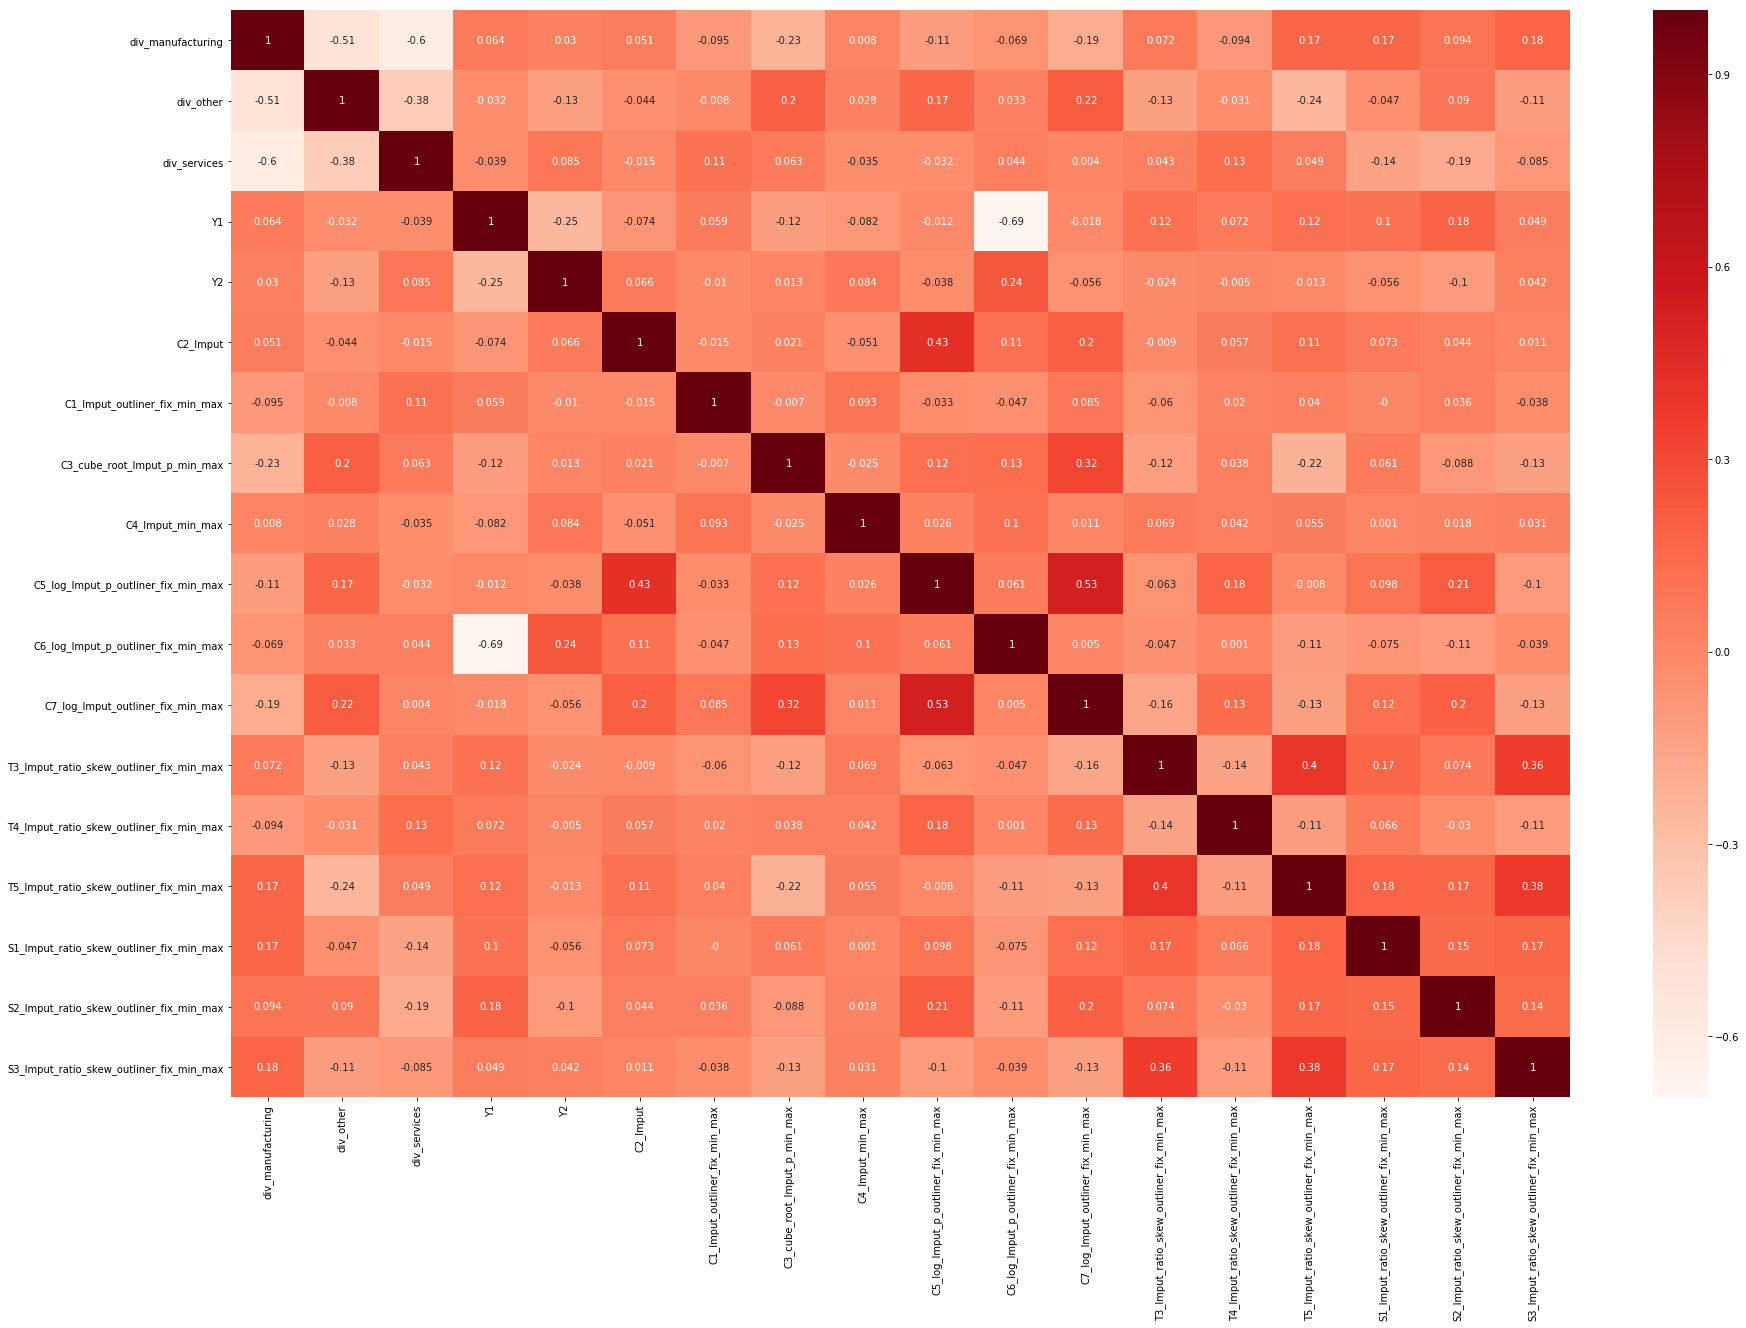

In [94]:
#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = df.corr().round(3)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [95]:
cor_target = abs(cor["Y1"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Y1                                     1.000
C6_log_Imput_p_outliner_fix_min_max    0.695
Name: Y1, dtype: float64

In [96]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

array([7.48386968e-02, 6.02012741e-02, 1.44277616e-01, 3.58191543e-01,
       2.14141092e-02, 8.77437117e-02, 4.34735892e-02, 3.35619243e-03,
       8.89506188e-01, 9.59043484e-01, 2.48962708e-02, 6.45156229e-03,
       1.43100036e-01, 1.69577568e-01, 1.96510751e-04, 3.48818695e-01])

In [86]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
feature_with_p_max

In [ ]:
#no of features
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 123)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


In [ ]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model,7 )             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

In [7]:
y1 = data.Y1
y2 = data.Y2

Check the shape of the data.

In [ ]:

cols =  [ 'T4_Imput_ratio', 'T5_Imput_ratio', 'C2_Imput', 'C3_cube_root_Imput_p', 'C5_log_Imput_p', 'S2_Imput_ratio_outliner_fix', 'C3_cube_root_Imput_p_min_max', 'C4_Imput_min_max', 'S2_Imput_ratio_outliner_fix_min_max']
# first 5 features 
cols

In [12]:
cols =  [ 'Y1','Y2','C6_Imput_p_outliner_fix_min_max_sqrt', 'C3_Imput_p',
        
                                                                'C1_Imput_outliner_fix_min_max',
                                                                'C2_Imput_min_max',
                                                                'C4_Imput_min_max_sqrt',
                                                                'C5_Imput_p_outliner_fix_min_max_sqrt',
                                                                
                                                                'C7_Imput_outliner_fix_min_max_sqrt',
                                                                'div_manufacturing','div_other','div_services',
                                                                'T3_Imput_ratio_outliner_fix_min_max_sqrt',
                                                                'T4_Imput_ratio_outliner_fix_min_max',
                                                                'T5_Imput_ratio_outliner_fix_min_max',
                                                                'S1_Imput_ratio_outliner_fix_min_max_sqrt',
                                                                'S2_Imput_ratio_outliner_fix_min_max_sqrt',
                                                                'S3_Imput_ratio_outliner_fix_min_max']

In [13]:

cols_y1 =  [ 'Y1','Y2', 'C6_log_Imput_p_outliner_fix_min_max',
                                  'C1_Imput_outliner_fix_min_max',
                                                               
                                                                'C4_Imput_min_max',
                                                                'C5_log_Imput_p_outliner_fix_min_max',
                                                              
         
                                                                'T3_Imput_ratio_outliner_fix_min_max',
                                                                'T4_Imput_ratio_outliner_fix_min_max',
                                                                'T5_Imput_ratio_outliner_fix_min_max',
                                                                
                                                                'S2_Imput_ratio_outliner_fix_min_max',
                                                               
                                                                ]

In [14]:
cols_y1_2 =  [ 'Y1','Y2', 'C3_cube_root_Imput_p',
                                  'C1_Imput_outliner_fix_min_max',
                                                               
                                                                'C4_Imput_min_max',
                                                                'C5_log_Imput_p_outliner_fix_min_max',
                                                              
         
                                                                
                                                               
                                                               
                                                                
                                                                'S2_Imput_ratio_outliner_fix_min_max',
                                                               
                                                                ]


In [15]:
cols_y1_3 =  [ 'Y1','Y2',   'C4_Imput_min_max',   'C1_Imput_outliner_fix_min_max',
                                                                'C5_log_Imput_p_outliner_fix_min_max',
                                                               
                                                               
                                                               'C7_log_Imput_outliner_fix_min_max',
                                                              
                                                           'S2_Imput_ratio_outliner_fix_min_max',
                                                                ]

In [14]:
selected_features_rfe_1 =['C2_Imput',  'C4_Imput_min_max',
      
      
      
       'S1_Imput_ratio_skew_outliner_fix_min_max']

selected_features_rfe_2 = [ 'T4_Imput_ratio_outliner_fix_min_max',
   
       'S2_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max']

In [21]:
best_features_spsa_1_y1 = ['S2_Imput_ratio_outliner_fix_min_max', 'C2_Imput',
       'T4_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max',
       'S1_Imput_ratio_outliner_fix_min_max', 'div_services',
       'C5_log_Imput_p_outliner_fix_min_max', 'C4_Imput_min_max',
       'C7_log_Imput_outliner_fix_min_max']


 'C1_Imput_outliner_fix_min_max',
                                                               
                                                                
          'C5_log_Imput_p_outliner_fix_min_max',
                                                               
      'C7_log_Imput_outliner_fix_min_max',


In [167]:
best_features_spsa2 =[ 
                                                              
                                                              
                                                                'C2_Imput',
                                                                
                                                                
                                                               
                                                            
                                                                'T5_Imput_ratio_skew_outliner_fix_min_max',
                                                                'T3_Imput_ratio_skew_outliner_fix_min_max',
                                                                'T4_Imput_ratio_skew_outliner_fix_min_max',
                                                                
                                                                'S1_Imput_ratio_skew_outliner_fix_min_max',
                                                                'S2_Imput_ratio_skew_outliner_fix_min_max',
                                                                ]
       

Use below code to select the first 5 features as predictors for `Y1`.

In [168]:
predictors_y1 = data[best_features_spsa2[:]]
predictors_y1.head()
#predictors_y1.pop('Y1')
#predictors_y1.pop('Y2')
predictors_y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
C2_Imput                                    660 non-null float64
T5_Imput_ratio_skew_outliner_fix_min_max    660 non-null float64
T3_Imput_ratio_skew_outliner_fix_min_max    660 non-null float64
T4_Imput_ratio_skew_outliner_fix_min_max    660 non-null float64
S1_Imput_ratio_skew_outliner_fix_min_max    660 non-null float64
S2_Imput_ratio_skew_outliner_fix_min_max    660 non-null float64
dtypes: float64(6)
memory usage: 31.1 KB


In [169]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(predictors_y1, y1)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False  True  True  True  True  True]
Feature Ranking: [2 1 1 1 1 1]


Upon investigation of the data, we know we have __six__ features (`X1 - X6`) predicting `Y2`. Use similar code (as below) to select them.

In [170]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,30):
    #Model building
    clf = LogisticRegression()
    X1_train, X1_test, y1_train, y1_test = train_test_split(predictors_y1, y1, test_size=0.2, random_state=123)
    clf.fit(X1_train, y1_train)

    y1_pred = clf.predict(X1_test)

    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf, X1_train, y1_train, cv=kfold, scoring=scoring)

    

    
    #calculate f1-score and AUC
    
    clf_roc_auc = roc_auc_score(y1_test, y1_pred)
    f1_score_lst.append(precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)
    


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y1 = confusion_matrix(y1_test, y1_pred)


#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X1_test, y1_test)))

print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))

print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y1)

print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y1_test, y1_pred))



F1 0.6754; AUC 0.6930 
Accuracy of classifier on test set: 0.67
10-fold cross validation average accuracy of classifier: 0.579
Confusion Matrix for Logistic Regression Classfier:
[[46 32]
 [11 43]]
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        78
           1       0.57      0.80      0.67        54

    accuracy                           0.67       132
   macro avg       0.69      0.69      0.67       132
weighted avg       0.71      0.67      0.68       132



Below code are used to evaluate model toward `Y2`. It is very similar to the code above - key difference is that `Y2` is imbalanced - so I wrote some code (under `# Begin oversampling`) to deal with that.

In [87]:
pd.DataFrame(zip(selected_features_rfe_2,clf.coef_[0] ) ,columns = [ 'feature' ,'feature importance']).sort_values( by ='feature importance'  , ascending= False)

,feature,feature importance
1,S2_Imput_ratio_outliner_fix_min_max,1.261963
0,T4_Imput_ratio_outliner_fix_min_max,0.914459
2,S3_Imput_ratio_outliner_fix_min_max,0.724062


In [71]:
selected_features_rfe_2

['T4_Imput_ratio_outliner_fix_min_max',
 'S2_Imput_ratio_outliner_fix_min_max',
 'S3_Imput_ratio_outliner_fix_min_max']